In [ ]:
# one time installation

# $ pip install bs4
# $ pip install tabulate
# $ pip install matplotlib
# $ pip install numpy 

In [1]:
# importing libraries 

import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'
SHORT_HEADERS = ['SNo', 'State Name','Covid19 Cases','Cured/Discharge/Migrated','death'] 

response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 

stats = [] 
all_rows = soup.find_all('tr') 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 4: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
        elif len(stat) == 5: 
            stats.append(stat) 
            
stats[-1][1] = "Total Cases"
stats.remove(stats[-1]) 

In [3]:
objects = [] 
for row in stats :
    objects.append(row[1]) 

y_pos = np.arange(len(objects)) 

performance = [] 
for row in stats :
    performance.append(int(row[2]) + int(row[3]))

In [4]:
table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 

  SNo  State Name                     Covid19 Cases    Cured/Discharge/Migrated    death
-----  ---------------------------  ---------------  --------------------------  -------
    1  Andaman and Nicobar Islands               11                          10        0
    2  Andhra Pradesh                           572                          36       14
    3  Arunachal Pradesh                          1                           0        0
    4  Assam                                     35                           5        1
    5  Bihar                                     83                          37        1
    6  Chandigarh                                21                           9        0
    7  Chhattisgarh                              36                          23        0
    8  Delhi                                   1640                          51       38
    9  Goa                                        7                           6        0
   10  Gujarat       

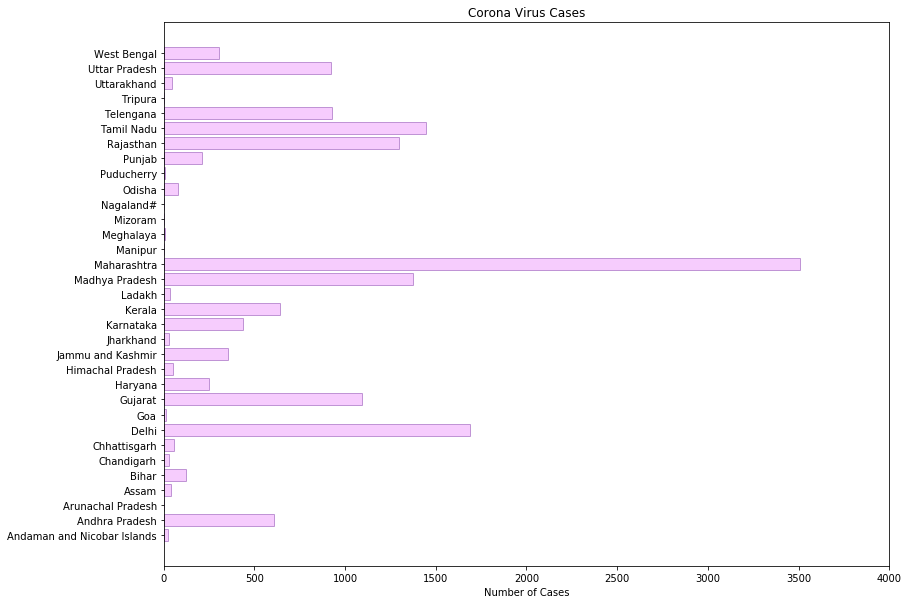

In [5]:
plt.figure(1, [13, 10])
plt.barh(y_pos, performance, height=0.8, left=0.6, align='center', alpha=0.4,
         color=(234/256.0, 128/256.0, 252/256.0), 
         edgecolor=(106/256.0, 27/256.0, 154/256.0)) 

plt.yticks(y_pos, objects) 
plt.xlim(1,4000) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 
